# Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.simplefilter("ignore")

# Loading Dataset

In [7]:
df = pd.read_csv('student_data.csv')

# Provided Dataset

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Summarizing dataset

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<AxesSubplot:>

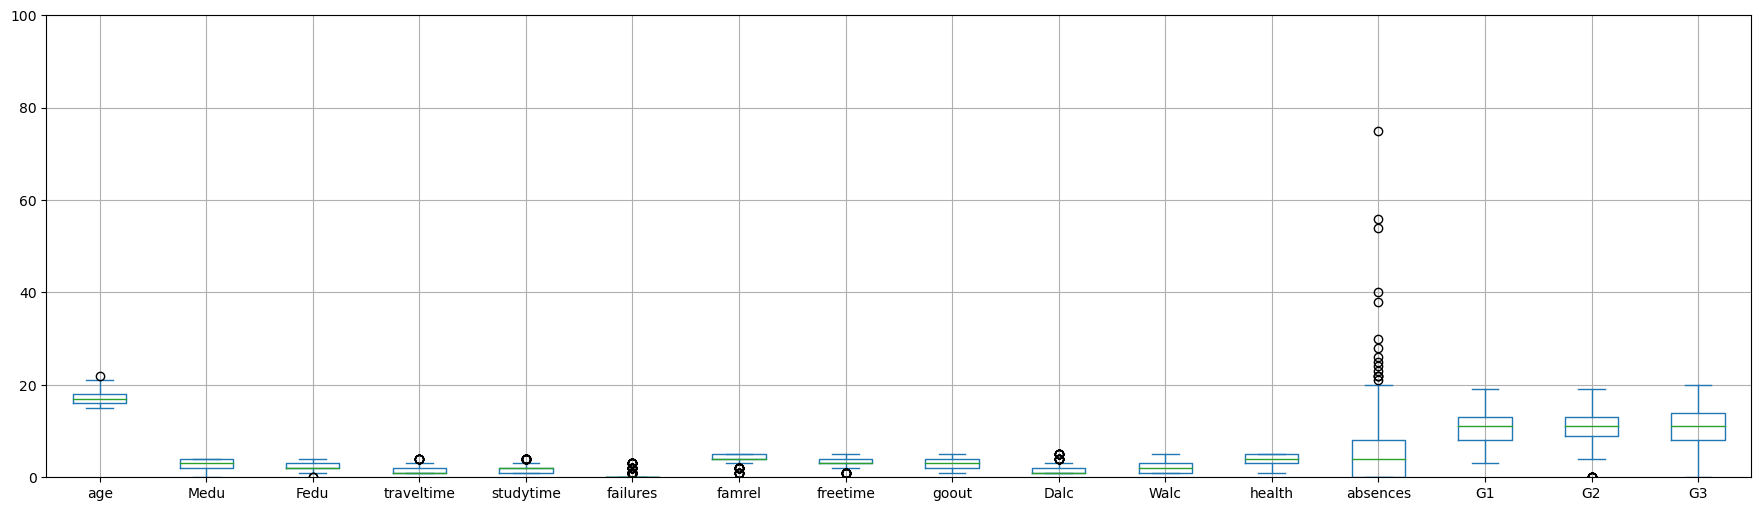

In [11]:
df.plot(kind='box', grid=True, ylim=[0, 100], figsize=(22, 6)) 

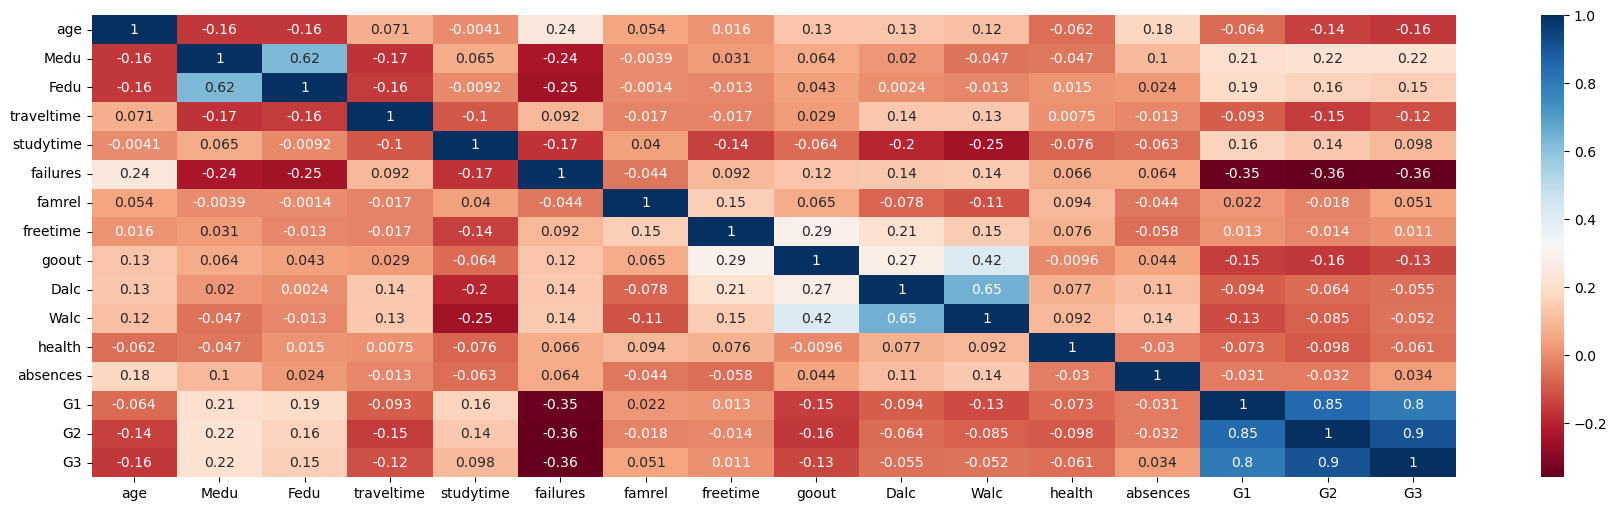

In [12]:
plt.figure(figsize=(22, 6))
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.show()

In [13]:
df.drop(['romantic', 'famsup','famrel','traveltime','failures','address','Pstatus','Fjob','Mjob','Fedu','Medu','famsize','reason','guardian','schoolsup','famsup','goout','Dalc','Walc'], axis=1, inplace=True)

### Finding Outliers

Number of outliers in the 'absences' column: 15


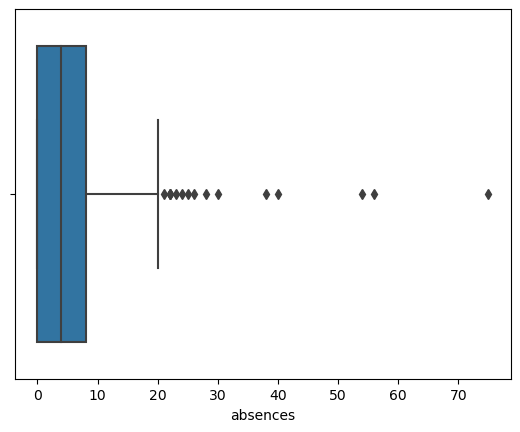

In [14]:
# Calculate IQR
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['absences'] < lower_bound) | (df['absences'] > upper_bound)

# Count the number of outliers
num_outliers = outliers.sum()

# Display the results
print(f"Number of outliers in the 'absences' column: {num_outliers}")

# Visualize the boxplot with outliers
sns.boxplot(x=df['absences'])
plt.show()


In [15]:
df.head(3)

,school,sex,age,studytime,paid,activities,nursery,higher,internet,freetime,health,absences,G1,G2,G3
0,GP,F,18,2,no,no,yes,yes,no,3,3,6,5,6,6
1,GP,F,17,2,no,no,no,yes,yes,3,3,4,5,5,6
2,GP,F,15,2,yes,no,yes,yes,yes,3,3,10,7,8,10


### Removing Outliers

Number of outliers removed: 15


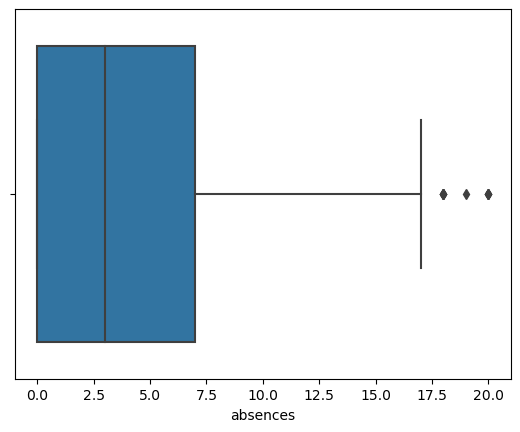

In [16]:
# Create a new DataFrame without outliers
df = df[~outliers]

# Display the results
print(f"Number of outliers removed: {outliers.sum()}")

# Visualize the boxplot without outliers
sns.boxplot(x=df['absences'])
plt.show()


In [17]:
df.head(3)

,school,sex,age,studytime,paid,activities,nursery,higher,internet,freetime,health,absences,G1,G2,G3
0,GP,F,18,2,no,no,yes,yes,no,3,3,6,5,6,6
1,GP,F,17,2,no,no,no,yes,yes,3,3,4,5,5,6
2,GP,F,15,2,yes,no,yes,yes,yes,3,3,10,7,8,10


In [18]:
df.freetime.value_counts()

3    152
4    113
2     60
5     39
1     16
Name: freetime, dtype: int64

In [19]:
df.health.value_counts()

5    141
3     88
4     65
1     44
2     42
Name: health, dtype: int64

In [20]:
df.absences.describe()

count    380.000000
mean       4.602632
std        4.968236
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

In [21]:
df['attendanceinpercentage']= (df.absences/max(df.absences))*100

In [22]:
df['attendanceinpercentage'] = df['attendanceinpercentage'].astype('int64')

In [23]:
df['Total'] = df['G1'] + df['G2'] + df['G3']

In [24]:
print(max(df.G1))
print(max(df.G2))
print(max(df.G3))

19 + 19 + 20

19
19
20


58

In [25]:
df['Percentage']= (df.Total / 58) * 100

In [26]:
df['Percentage'] = df['Percentage'].astype('int64')

In [27]:
df['Grade'] = df['Percentage'].apply(lambda x: "A+" if x>=90 else "A" if x>=80 else "B+" if x>=70 else "B" if x>=60 else "C+" if x>=50 else "C" if x>=40 else "D" if x>=30 else "Fail")

In [28]:
df[df.attendanceinpercentage > 40]['school'].value_counts()

GP    65
MS     6
Name: school, dtype: int64

<AxesSubplot:>

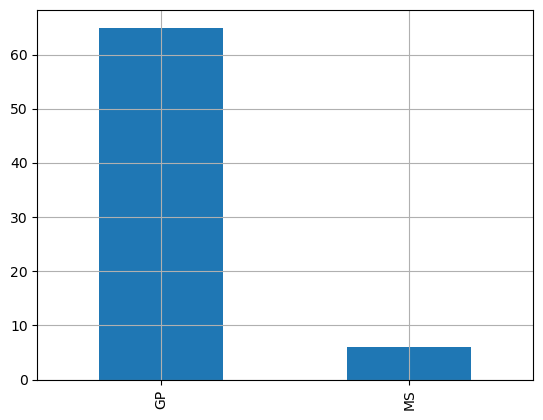

In [29]:
df[df.attendanceinpercentage > 40]['school'].value_counts().plot(kind='bar', grid=True)

In [30]:
df[df.attendanceinpercentage < 40]['school'].value_counts()

GP    249
MS     38
Name: school, dtype: int64

<AxesSubplot:>

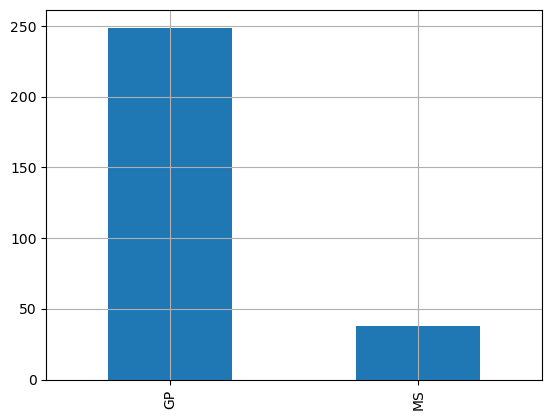

In [31]:
df[df.attendanceinpercentage < 40]['school'].value_counts().plot(kind='bar', grid=True)

In [32]:
df[df.attendanceinpercentage > 40][['sex','school']].value_counts()

sex  school
F    GP        33
M    GP        32
F    MS         3
M    MS         3
dtype: int64

<AxesSubplot:xlabel='sex,school'>

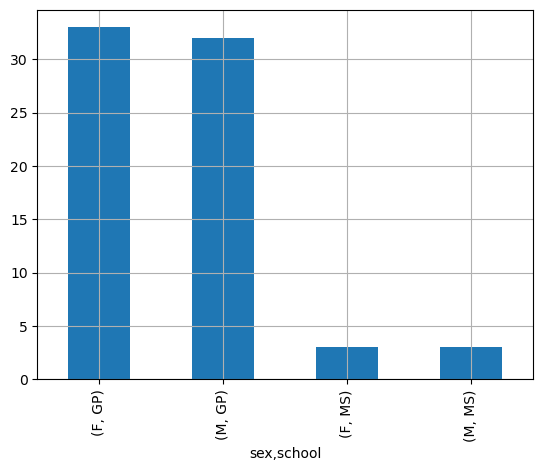

In [33]:
df[df.attendanceinpercentage > 40][['sex','school']].value_counts().plot(kind='bar', grid=True)

In [34]:
df[df.attendanceinpercentage < 40][['sex','school']].value_counts()

sex  school
F    GP        131
M    GP        118
F    MS         21
M    MS         17
dtype: int64

<AxesSubplot:xlabel='sex,school'>

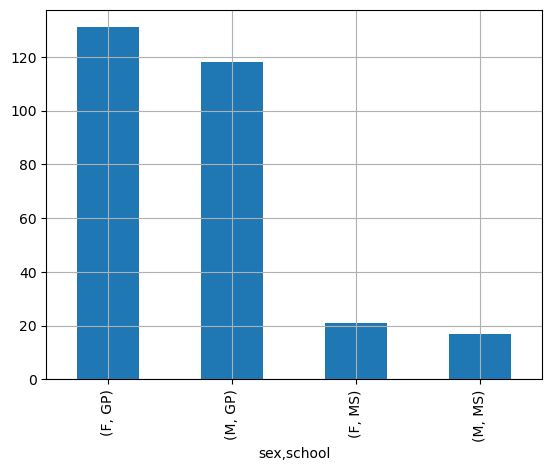

In [35]:
df[df.attendanceinpercentage < 40][['sex','school']].value_counts().plot(kind='bar', grid=True)

<AxesSubplot:>

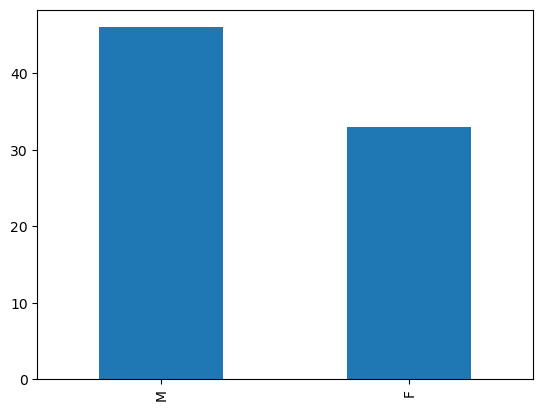

In [36]:
df[df.Percentage > 70]['sex'].value_counts().plot(kind='bar')

In [37]:
df.head(5)

,school,sex,age,studytime,paid,activities,nursery,higher,internet,freetime,health,absences,G1,G2,G3,attendanceinpercentage,Total,Percentage,Grade
0,GP,F,18,2,no,no,yes,yes,no,3,3,6,5,6,6,30,17,29,Fail
1,GP,F,17,2,no,no,no,yes,yes,3,3,4,5,5,6,20,16,27,Fail
2,GP,F,15,2,yes,no,yes,yes,yes,3,3,10,7,8,10,50,25,43,C
3,GP,F,15,3,yes,yes,yes,yes,yes,2,5,2,15,14,15,10,44,75,B+
4,GP,F,16,2,yes,no,yes,yes,no,3,5,4,6,10,10,20,26,44,C


In [38]:
df.columns = df.columns.str.capitalize()

# Saving Our Preprocessed Data

In [39]:
df.to_csv('Cleaned_student_data.csv', index=False)

# Real Analysis begin from here

In [40]:
df = pd.read_csv('Cleaned_student_data.csv')

In [41]:
df.head()

,School,Sex,Age,Studytime,Paid,Activities,Nursery,Higher,Internet,Freetime,Health,Absences,G1,G2,G3,Attendanceinpercentage,Total,Percentage,Grade
0,GP,F,18,2,no,no,yes,yes,no,3,3,6,5,6,6,30,17,29,Fail
1,GP,F,17,2,no,no,no,yes,yes,3,3,4,5,5,6,20,16,27,Fail
2,GP,F,15,2,yes,no,yes,yes,yes,3,3,10,7,8,10,50,25,43,C
3,GP,F,15,3,yes,yes,yes,yes,yes,2,5,2,15,14,15,10,44,75,B+
4,GP,F,16,2,yes,no,yes,yes,no,3,5,4,6,10,10,20,26,44,C


In [42]:
print(f"""

Comparing Schools based on their average percentages: 

GP school: {df.Percentage[df.School == 'GP'].mean()}

vs

MS school: {df.Percentage[df.School == 'MS'].mean()}


""")



Comparing Schools based on their average percentages: 

GP school: 55.11377245508982

vs

MS school: 52.45652173913044





<AxesSubplot:xlabel='School', ylabel='Percentage'>

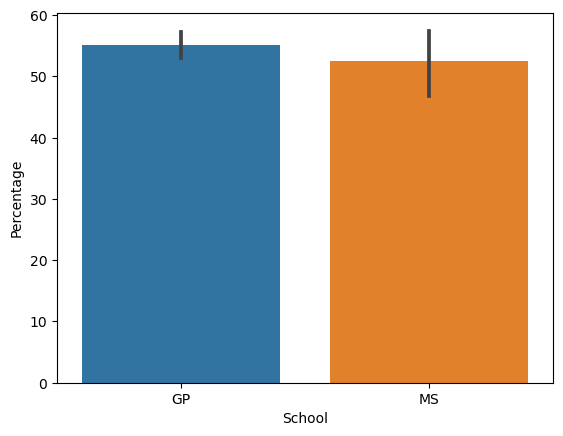

In [43]:
sns.barplot(x="School", y="Percentage", data=df)

In [44]:
df.query('Percentage < 50 and Sex == "M" and School == "MS"')

,School,Sex,Age,Studytime,Paid,Activities,Nursery,Higher,Internet,Freetime,Health,Absences,G1,G2,G3,Attendanceinpercentage,Total,Percentage,Grade
335,MS,M,19,2,no,no,yes,yes,yes,4,2,8,8,7,8,40,23,39,D
337,MS,M,18,1,no,no,yes,no,yes,3,3,7,8,7,8,35,23,39,D
338,MS,M,19,1,no,no,yes,yes,yes,4,5,4,8,8,8,20,24,41,C
366,MS,M,18,1,no,yes,no,yes,yes,4,5,5,7,6,7,25,20,34,D
368,MS,M,19,1,no,no,yes,yes,no,3,5,0,6,5,0,0,11,18,Fail
369,MS,M,18,1,yes,no,yes,yes,no,4,3,14,6,5,5,70,16,27,Fail
375,MS,M,20,2,yes,no,yes,yes,no,5,4,11,9,9,9,55,27,46,C
377,MS,M,21,1,no,no,no,yes,no,5,3,3,10,8,7,15,25,43,C
379,MS,M,19,1,no,no,yes,yes,yes,2,5,5,8,9,9,25,26,44,C


In [45]:
df.Grade.value_counts().reset_index()

,index,Grade
0,C+,74
1,B,71
2,C,64
3,B+,59
4,Fail,42
5,D,38
6,A,21
7,A+,11


<AxesSubplot:>

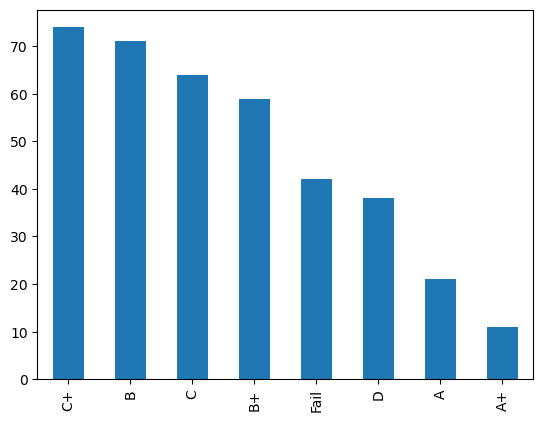

In [46]:
df.Grade.value_counts().plot(kind='bar')

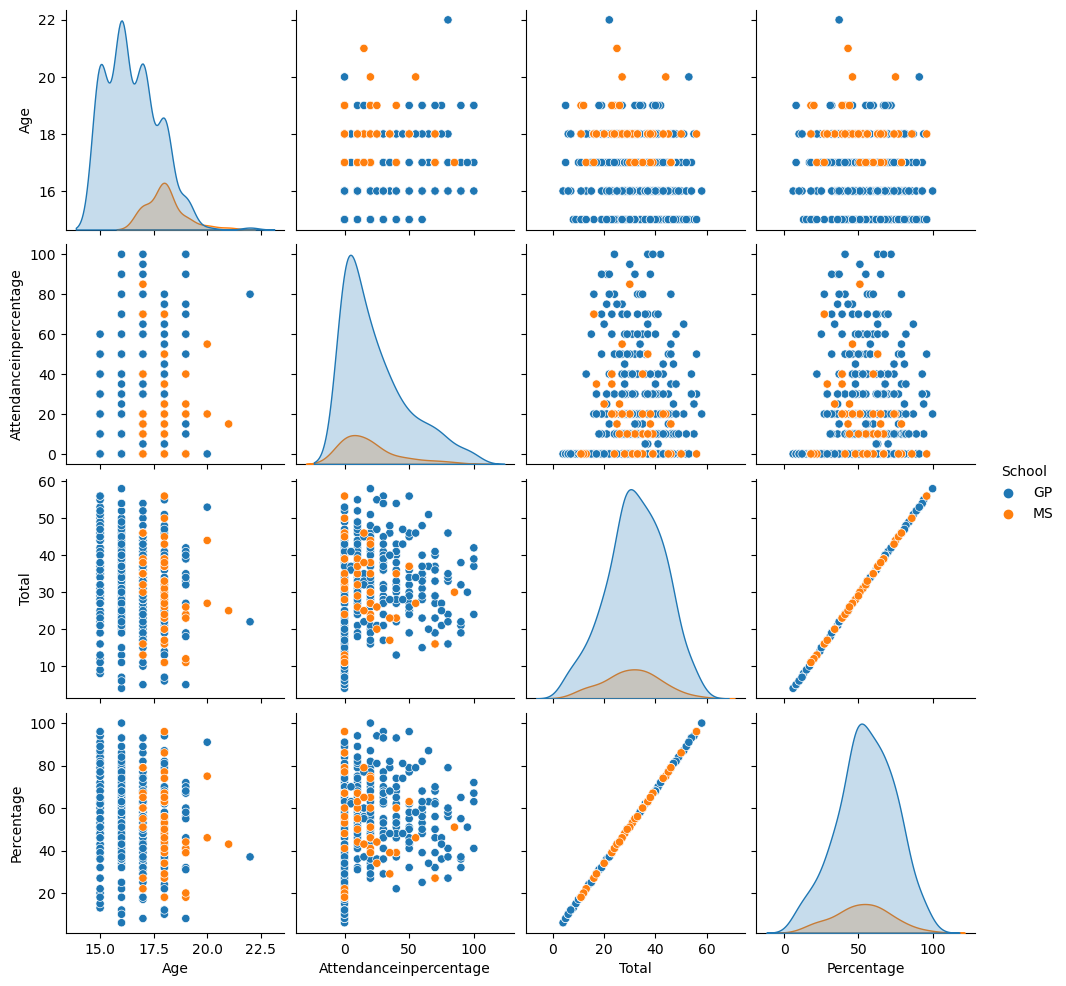

In [47]:
sns.pairplot(df[["Age","Attendanceinpercentage","Total","Percentage","School"]], hue='School')

# Machine Learning

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df.Paid.value_counts()

no     209
yes    171
Name: Paid, dtype: int64

In [52]:
df['School'] = df['School'].apply(lambda x: 1 if x == "GP" else 0)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == "M" else 0)

In [53]:
yesorno = lambda x: 1 if x == "yes" else 0

df['Paid'] = df['Paid'].apply(yesorno)
df['Activities'] = df['Activities'].apply(yesorno)
df['Nursery'] = df['Nursery'].apply(yesorno)
df['Higher'] = df['Higher'].apply(yesorno)
df['Internet'] = df['Internet'].apply(yesorno)

In [54]:
df.query(' Paid == 1 & School == 0 & Higher == 1')

,School,Sex,Age,Studytime,Paid,Activities,Nursery,Higher,Internet,Freetime,Health,Absences,G1,G2,G3,Attendanceinpercentage,Total,Percentage,Grade
336,0,1,17,2,1,0,1,1,1,5,3,2,13,13,13,10,39,67,B
339,0,1,17,2,1,1,0,1,1,5,2,4,13,11,11,20,35,60,B
341,0,0,17,2,1,1,1,1,1,3,5,4,12,13,13,20,38,65,B
348,0,0,17,2,1,1,1,1,1,3,1,0,16,15,15,0,46,79,B+
350,0,1,18,2,1,0,1,1,0,3,3,4,10,10,10,20,30,51,C+
351,0,1,18,3,1,0,1,1,1,2,5,0,13,13,13,0,39,67,B
352,0,0,17,1,1,0,1,1,1,2,1,0,7,6,0,0,13,22,Fail
353,0,0,18,1,1,0,1,1,1,2,4,0,11,10,10,0,31,53,C+
354,0,0,18,2,1,0,0,1,1,2,5,10,14,12,11,50,37,63,B
361,0,0,20,3,1,0,0,1,1,4,3,4,15,14,15,20,44,75,B+


In [55]:
df = df.copy()

In [56]:
# Saving our training data

In [57]:
df.to_csv('Train_student_data.csv', index=False)

In [58]:
X = df.drop(['Grade'], axis=1)

In [59]:
Y = df['Grade']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=32, train_size=0.75, test_size=0.25)

In [61]:
Y = df.Grade

In [62]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()

In [63]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [64]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [65]:
Y_pred_DT = DT.predict(X_test)
Y_pred_LR = LR.predict(X_test)

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(' --- Report For Decision Tree:  ---')
print(classification_report( Y_test, Y_pred_DT, labels = ['A+','A','B+','B', 'C+','C', 'D', 'Fail']))

print(' --- Report For Logistic Regression: ---')
print(classification_report( Y_test, Y_pred_LR, labels = ['A+','A','B+','B', 'C+','C', 'D', 'Fail']))

 --- Report For Decision Tree:  ---
              precision    recall  f1-score   support

          A+       1.00      1.00      1.00         4
           A       1.00      1.00      1.00         8
          B+       1.00      1.00      1.00        14
           B       1.00      1.00      1.00        18
          C+       1.00      1.00      1.00        22
           C       1.00      1.00      1.00        11
           D       1.00      1.00      1.00         8
        Fail       1.00      1.00      1.00        10

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95

 --- Report For Logistic Regression: ---
              precision    recall  f1-score   support

          A+       0.00      0.00      0.00         4
           A       0.00      0.00      0.00         8
          B+       0.50      0.64      0.56        14
           B       0.62      0.83      0.71        18
 

In [68]:
from sklearn.metrics import accuracy_score

print(' --- Accuracy For Logisitic Regression ---')

print(accuracy_score(Y_test, Y_pred_LR))

print(' --- Accuracy For Decision Tree ---')

print(accuracy_score(Y_test, Y_pred_DT))

 --- Accuracy For Logisitic Regression ---
0.6421052631578947
 --- Accuracy For Decision Tree ---
1.0


 --- Matrix For Decision Tree ---


<AxesSubplot:>

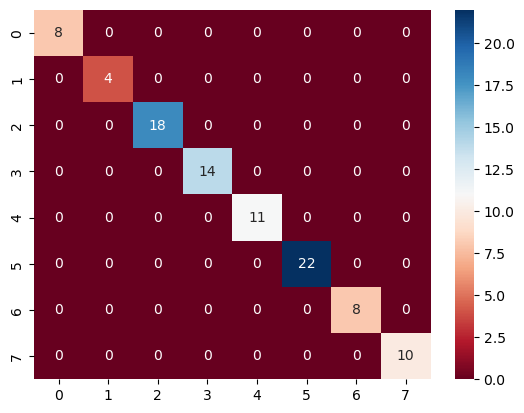

In [69]:
from sklearn.metrics import confusion_matrix

print(' --- Matrix For Decision Tree ---')

sns.heatmap(confusion_matrix(Y_test, Y_pred_DT), cmap='RdBu', annot=True )

 --- Matrix For Logisitic Regression ---


<AxesSubplot:>

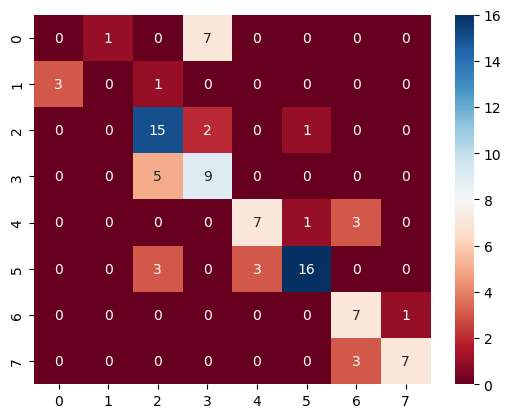

In [70]:
print(' --- Matrix For Logisitic Regression ---')
sns.heatmap(confusion_matrix(Y_test, Y_pred_LR), cmap='RdBu', annot=True )

In [71]:
df.iloc[123]

School                     1
Sex                        0
Age                       15
Studytime                  2
Paid                       0
Activities                 1
Nursery                    1
Higher                     1
Internet                   1
Freetime                   3
Health                     1
Absences                   0
G1                         7
G2                        10
G3                        11
Attendanceinpercentage     0
Total                     28
Percentage                48
Grade                      C
Name: 123, dtype: object

In [72]:
df.iloc[123].values

array([1, 0, 15, 2, 0, 1, 1, 1, 1, 3, 1, 0, 7, 10, 11, 0, 28, 48, 'C'],
      dtype=object)

# Removing grade for prediction:

Let our models predict the grade we get.

In [73]:
print('This is the grade our Logistic Regression model predict: ')
predicted_grade_LR = LR.predict([[1, 0, 15, 2, 0, 1, 1, 1, 1, 3, 1, 0, 7, 10, 11, 0, 28, 48]])
predicted_grade_LR[0]

This is the grade our Logistic Regression model predict: 


'C'

In [74]:
print('This is the grade our Decision Tree model predict: ')
predicted_grade_DT = DT.predict([[1, 0, 15, 2, 0, 1, 1, 1, 1, 3, 1, 0, 7, 10, 11, 0, 28, 48]])
predicted_grade_DT[0]

This is the grade our Decision Tree model predict: 


'C'

### Both Models Predicted 'C' grade on given data

In [75]:
# Done